In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
sns.set_style("darkgrid")
sns.set_context("talk")

In [3]:
# loading time-series data
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
)
print(df.head())
print(df.info())

# set ds as the time index
df.index = pd.to_datetime(df["ds"])
df = df.drop(columns="ds")

print(df.head())
print(df.info())

           ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB
None
                   y
ds                  
2007-12-10  9.590761
2007-12-11  8.519590
2007-12-12  8.183677
2007-12-13  8.072467
2007-12-14  7.893572
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2905 entries, 2007-12-10 to 2016-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       2905 non-null   float64
dtypes: float64(1)
memory usage: 45.4 KB
None


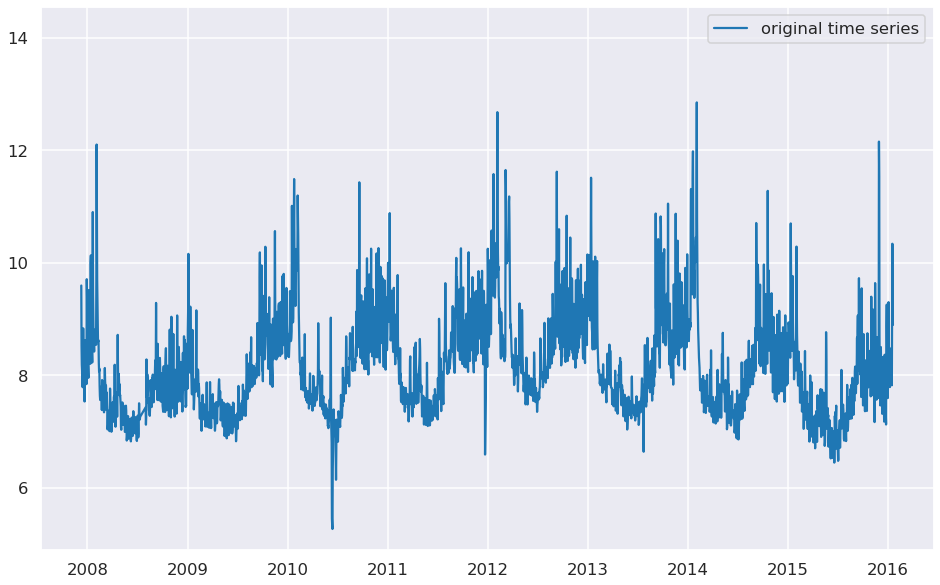

In [4]:
plt.figure(figsize=(16, 10))
plt.plot_date(x=df.index, y=df, fmt="-", label="original time series")
plt.legend()
plt.ylim(top=plt.ylim()[1] * 1.1)  # stretching the top of the plot by 10%
plt.title("")
plt.show();

In [5]:
# subsetting the data
df_sub = df.loc["01-01-2011":"31-12-2014"]

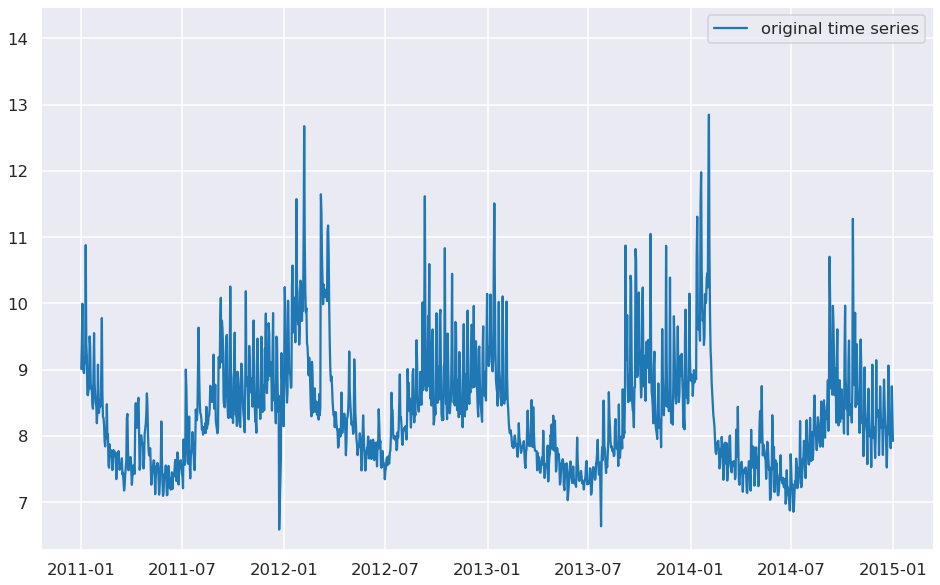

In [6]:
plt.figure(figsize=(16, 10))
plt.plot_date(x=df_sub.index, y=df_sub, fmt="-", label="original time series")
plt.legend()
plt.ylim(top=plt.ylim()[1] * 1.1)  # stretching the top of the plot by 10%
plt.title("")
plt.show();

In [7]:
# convert the datetime to floats
time_scaler = MinMaxScaler()

# shape the inputs
X = time_scaler.fit_transform(df.index.values.reshape(-1, 1))
y = df.values.reshape(-1, 1)

# fit the lin reg
reg = LinearRegression().fit(X, y)

In [8]:
# predict using the dates of the original time series
predict_time_range = pd.date_range(start=df_sub.index[0], end=df.index[-1], freq="D")
X_predict = time_scaler.transform(predict_time_range.values.reshape(-1, 1))
y_predict = reg.predict(X_predict)

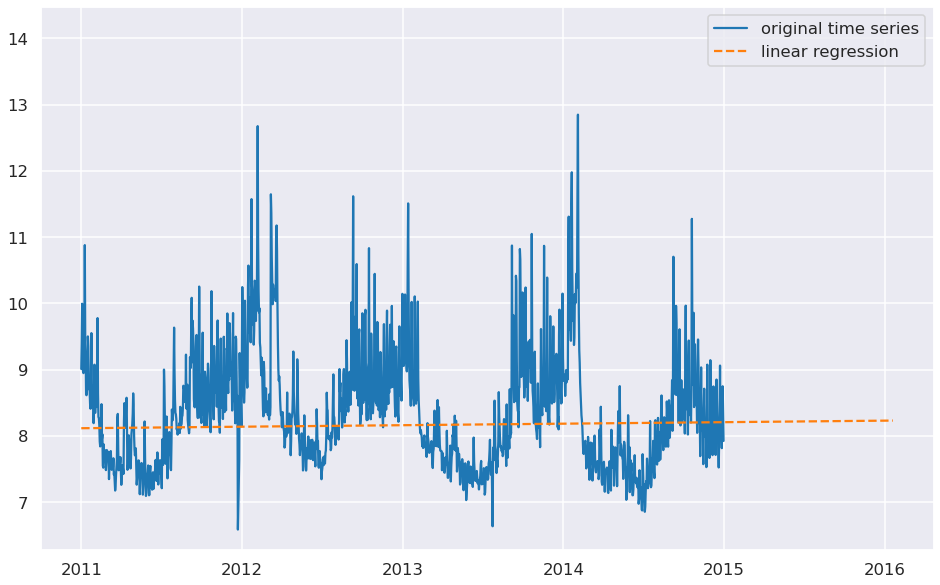

In [9]:
plt.figure(figsize=(16, 10))
plt.plot_date(x=df_sub.index, y=df_sub, fmt="-", label="original time series")
plt.plot_date(x=predict_time_range, y=y_predict, fmt="--", label="linear regression")
plt.legend()
plt.ylim(top=plt.ylim()[1] * 1.1)  # stretching the top of the plot by 10%
plt.title("")
plt.show();

In [10]:
print(reg.intercept_)
print(reg.coef_)

[8.04539627]
[[0.18513337]]
